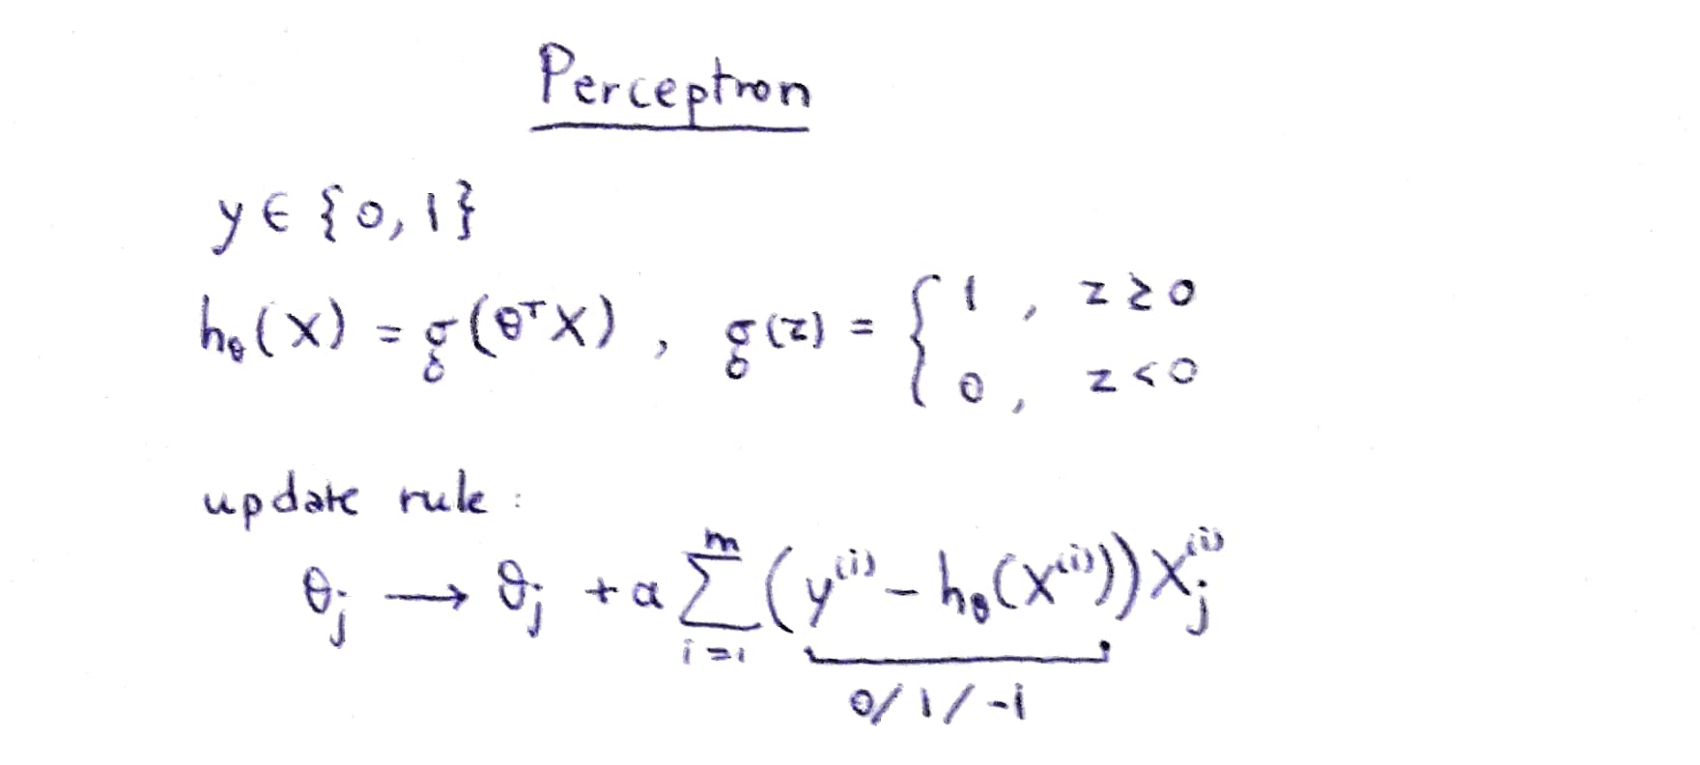

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [5]:
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X.shape, y.shape

((150, 2), (150,))

In [6]:
def unit_step_function(x):
    return np.where(x>0, 1, 0)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [9]:
class Perceptron:
    
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.activation_function = unit_step_function
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            for index, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation_function(linear_output)
                update = self.lr * (y[index] - y_pred)
                self.weights += update*x_i 
                self.bias += update
                
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.activation_function(linear_output)
        return y_pred

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
perceptron = Perceptron(lr=0.01, n_iters=1000)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy(y_pred, y_test)

1.0

The points (x0_1,x1_1) & (x0_2,x1_2) are on the decision boundary satisfying $\theta^{T}X = 0$

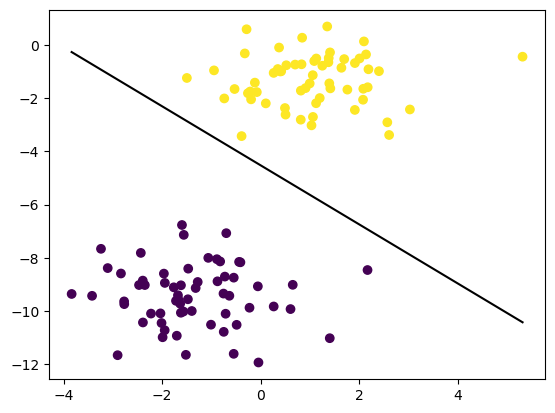

In [12]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker='o')
# np.amin() - returns the minimum value of an array 
x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])
x1_1 = (-perceptron.weights[0]*x0_1-perceptron.bias)/perceptron.weights[1]
x1_2 = (-perceptron.weights[0]*x0_2-perceptron.bias)/perceptron.weights[1]
plt.plot([x0_1,x0_2], [x1_1,x1_2], c='k')